In [175]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.io import wavfile

In [4]:
fs, data = wavfile.read('modulation.wav')

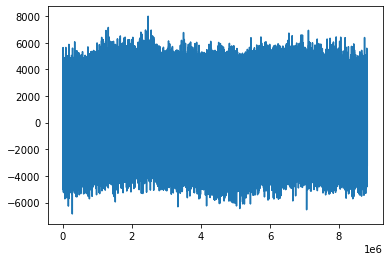

In [5]:
plt.plot(data)

In [387]:
frame_size = int(fs * 100e-3)
frame_size

4410

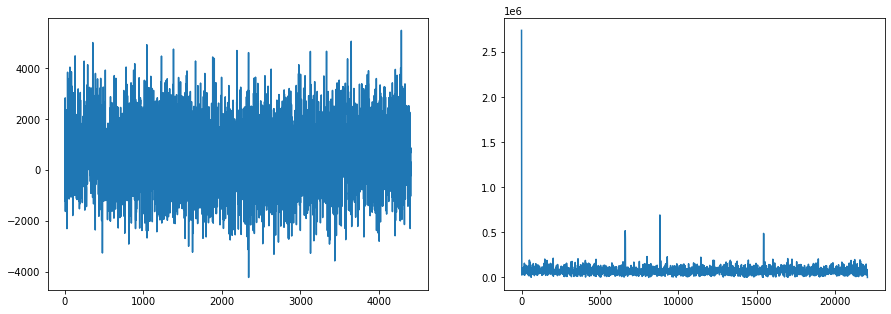

In [392]:
frame_idx = 1501
win_data = data[frame_idx*frame_size:(frame_idx+1)*frame_size]
win_data_fft = np.fft.rfft(win_data)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(win_data)
plt.subplot(122)
plt.plot(np.fft.rfftfreq(win_data.shape[0], 1 / fs), np.abs(win_data_fft))

In [221]:
frame_size

8820

In [222]:
data.shape[0] / frame_size

1000.0

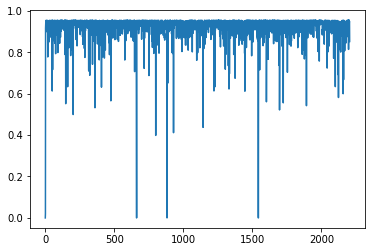

In [403]:
win_data_fft_abs = np.abs(win_data_fft)
win_data_fft_abs_mean = np.median(win_data_fft_abs)
win_data_fft_abs_std = np.std(win_data_fft_abs)
win_data_fft_dev = np.abs((win_data_fft_abs - win_data_fft_abs_mean) / win_data_fft_abs_std)
win_data_likely_est = (win_data_fft_dev - 2.) / 3 * (-.98) + .99
win_data_likely_est = np.clip(win_data_likely_est, 0.05, 0.95)
win_data_likely_est = stats.norm.cdf(win_data_fft_dev + 2) - stats.norm.cdf(win_data_fft_dev - 2)
plt.plot(win_data_likely_est)

In [402]:
np.median(win_data_fft_abs) / np.sqrt(win_data.shape[0])

1038.6483110797426

In [394]:
win_data_likely_est.min()

0.0

In [180]:
stats.norm.cdf(2)

0.9772498680518208

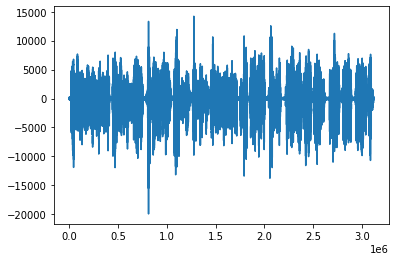

In [404]:
fs, data = wavfile.read('recording.wav')
plt.plot(data)